### Supervised learning - Regression

#### Importing data for supervised learning

In this chapter, you will work with Gapminder data that we have consolidated into one CSV file,  'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.
Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

- Import numpy and pandas as their standard aliases.
- Read the file 'gapminder.csv' into a DataFrame df using the read_csv() function.
- Create array X for the 'fertility' feature and array y for the 'life' target variable.
- Reshape the arrays by using the .reshape() method and passing in (-1, 1).

In [36]:
# Import numpy and pandas
import numpy as np
import pandas as pd

In [37]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv("Data/gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
dtypes: float64(9)
memory usage: 9.9 KB


In [39]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [40]:
# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

print(X)
print(y)

[2.73 6.43 2.24 1.4  1.96 1.41 1.99 1.89 2.38 1.83 1.42 1.82 2.91 5.27
 2.51 3.48 2.86 1.9  1.43 6.04 6.48 3.05 5.17 1.68 6.81 1.89 2.43 5.05
 5.1  1.91 4.91 1.43 1.5  1.89 3.76 2.73 2.95 2.32 5.31 5.16 1.62 2.74
 1.85 1.97 4.28 5.8  1.79 1.37 4.19 1.46 4.12 5.34 5.25 2.74 3.5  3.27
 1.33 2.12 2.64 2.48 1.88 2.   2.92 1.39 2.39 1.34 2.51 4.76 1.5  1.57
 3.34 5.19 1.42 1.63 4.79 5.78 2.05 2.38 6.82 1.38 4.94 1.58 2.35 1.49
 2.37 2.44 5.54 2.05 2.9  1.77 2.12 2.72 7.59 6.02 1.96 2.89 3.58 2.61
 4.07 3.06 2.58 3.26 1.33 1.36 2.2  1.34 1.49 5.06 5.11 1.41 5.13 1.28
 1.31 1.43 7.06 2.54 1.42 2.32 4.79 2.41 3.7  1.92 1.47 3.7  5.54 1.48
 4.88 1.8  2.04 2.15 6.34 1.38 1.87 2.07 2.11 2.46 1.86 5.88 3.85]
[75.3 58.3 75.5 72.5 81.5 80.4 70.6 72.2 68.4 75.3 70.1 79.4 70.7 63.2
 67.6 70.9 61.2 73.9 73.2 59.4 57.4 66.2 56.6 80.7 54.8 78.9 75.1 62.6
 58.6 79.7 55.9 76.5 77.8 78.7 61.  74.  70.1 74.1 56.7 60.4 74.  65.7
 79.4 81.  57.5 62.2 72.1 80.  62.7 79.5 70.8 58.3 51.3 63.  61.7 70.9
 73.8 82. 

In [41]:
# Print the dim+ensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


In [42]:
# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

print(X)
print(y)

[[2.73]
 [6.43]
 [2.24]
 [1.4 ]
 [1.96]
 [1.41]
 [1.99]
 [1.89]
 [2.38]
 [1.83]
 [1.42]
 [1.82]
 [2.91]
 [5.27]
 [2.51]
 [3.48]
 [2.86]
 [1.9 ]
 [1.43]
 [6.04]
 [6.48]
 [3.05]
 [5.17]
 [1.68]
 [6.81]
 [1.89]
 [2.43]
 [5.05]
 [5.1 ]
 [1.91]
 [4.91]
 [1.43]
 [1.5 ]
 [1.89]
 [3.76]
 [2.73]
 [2.95]
 [2.32]
 [5.31]
 [5.16]
 [1.62]
 [2.74]
 [1.85]
 [1.97]
 [4.28]
 [5.8 ]
 [1.79]
 [1.37]
 [4.19]
 [1.46]
 [4.12]
 [5.34]
 [5.25]
 [2.74]
 [3.5 ]
 [3.27]
 [1.33]
 [2.12]
 [2.64]
 [2.48]
 [1.88]
 [2.  ]
 [2.92]
 [1.39]
 [2.39]
 [1.34]
 [2.51]
 [4.76]
 [1.5 ]
 [1.57]
 [3.34]
 [5.19]
 [1.42]
 [1.63]
 [4.79]
 [5.78]
 [2.05]
 [2.38]
 [6.82]
 [1.38]
 [4.94]
 [1.58]
 [2.35]
 [1.49]
 [2.37]
 [2.44]
 [5.54]
 [2.05]
 [2.9 ]
 [1.77]
 [2.12]
 [2.72]
 [7.59]
 [6.02]
 [1.96]
 [2.89]
 [3.58]
 [2.61]
 [4.07]
 [3.06]
 [2.58]
 [3.26]
 [1.33]
 [1.36]
 [2.2 ]
 [1.34]
 [1.49]
 [5.06]
 [5.11]
 [1.41]
 [5.13]
 [1.28]
 [1.31]
 [1.43]
 [7.06]
 [2.54]
 [1.42]
 [2.32]
 [4.79]
 [2.41]
 [3.7 ]
 [1.92]
 [1.47]
 [3.7 ]
 [5.54]


In [43]:
# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


#### Exploring the Gapminder data

As always, it is important to explore your data before building models. Below, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset, which has been pre-loaded into a DataFrame as  df.Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

In case you are curious, the heatmap was generated using Seaborn's heatmap function and the following line of code, where   `df.corr()` computes the pairwise correlation between columns:

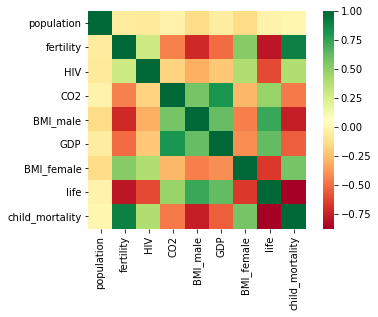

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

* It can be seen that 
    - life and fertility are negatively correlated.
    - GDP and life are positively correlated.

#### Fit & predict for regression

Now, you will fit a linear regression and predict life expectancy using just one feature. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.
A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the R2
 score using sckit-learn's `.score()` method.

- Import LinearRegression from sklearn.linear_model.
- Create a LinearRegression regressor called reg.
- Set up the prediction space to range from the minimum to the maximum of X_fertility.
- Fit the regressor to the data (X_fertility and y) and compute its predictions using the `.predict()` method and the prediction_space array.
- Compute and print the R2 score using the `.score()` method.
- Overlay the plot with your linear regression line.

In [45]:
y = np.array(df.life)
X_fertility = np.array(df.fertility)
X_fertility

array([2.73, 6.43, 2.24, 1.4 , 1.96, 1.41, 1.99, 1.89, 2.38, 1.83, 1.42,
       1.82, 2.91, 5.27, 2.51, 3.48, 2.86, 1.9 , 1.43, 6.04, 6.48, 3.05,
       5.17, 1.68, 6.81, 1.89, 2.43, 5.05, 5.1 , 1.91, 4.91, 1.43, 1.5 ,
       1.89, 3.76, 2.73, 2.95, 2.32, 5.31, 5.16, 1.62, 2.74, 1.85, 1.97,
       4.28, 5.8 , 1.79, 1.37, 4.19, 1.46, 4.12, 5.34, 5.25, 2.74, 3.5 ,
       3.27, 1.33, 2.12, 2.64, 2.48, 1.88, 2.  , 2.92, 1.39, 2.39, 1.34,
       2.51, 4.76, 1.5 , 1.57, 3.34, 5.19, 1.42, 1.63, 4.79, 5.78, 2.05,
       2.38, 6.82, 1.38, 4.94, 1.58, 2.35, 1.49, 2.37, 2.44, 5.54, 2.05,
       2.9 , 1.77, 2.12, 2.72, 7.59, 6.02, 1.96, 2.89, 3.58, 2.61, 4.07,
       3.06, 2.58, 3.26, 1.33, 1.36, 2.2 , 1.34, 1.49, 5.06, 5.11, 1.41,
       5.13, 1.28, 1.31, 1.43, 7.06, 2.54, 1.42, 2.32, 4.79, 2.41, 3.7 ,
       1.92, 1.47, 3.7 , 5.54, 1.48, 4.88, 1.8 , 2.04, 2.15, 6.34, 1.38,
       1.87, 2.07, 2.11, 2.46, 1.86, 5.88, 3.85])

In [46]:
X_fertility = [[x] for x in X_fertility]
X_fertility

[[2.73],
 [6.43],
 [2.24],
 [1.4],
 [1.96],
 [1.41],
 [1.99],
 [1.89],
 [2.38],
 [1.83],
 [1.42],
 [1.82],
 [2.91],
 [5.27],
 [2.51],
 [3.48],
 [2.86],
 [1.9],
 [1.43],
 [6.04],
 [6.48],
 [3.05],
 [5.17],
 [1.68],
 [6.81],
 [1.89],
 [2.43],
 [5.05],
 [5.1],
 [1.91],
 [4.91],
 [1.43],
 [1.5],
 [1.89],
 [3.76],
 [2.73],
 [2.95],
 [2.32],
 [5.31],
 [5.16],
 [1.62],
 [2.74],
 [1.85],
 [1.97],
 [4.28],
 [5.8],
 [1.79],
 [1.37],
 [4.19],
 [1.46],
 [4.12],
 [5.34],
 [5.25],
 [2.74],
 [3.5],
 [3.27],
 [1.33],
 [2.12],
 [2.64],
 [2.48],
 [1.88],
 [2.0],
 [2.92],
 [1.39],
 [2.39],
 [1.34],
 [2.51],
 [4.76],
 [1.5],
 [1.57],
 [3.34],
 [5.19],
 [1.42],
 [1.63],
 [4.79],
 [5.78],
 [2.05],
 [2.38],
 [6.82],
 [1.38],
 [4.94],
 [1.58],
 [2.35],
 [1.49],
 [2.37],
 [2.44],
 [5.54],
 [2.05],
 [2.9],
 [1.77],
 [2.12],
 [2.72],
 [7.59],
 [6.02],
 [1.96],
 [2.89],
 [3.58],
 [2.61],
 [4.07],
 [3.06],
 [2.58],
 [3.26],
 [1.33],
 [1.36],
 [2.2],
 [1.34],
 [1.49],
 [5.06],
 [5.11],
 [1.41],
 [5.13],
 [1.28],
 [

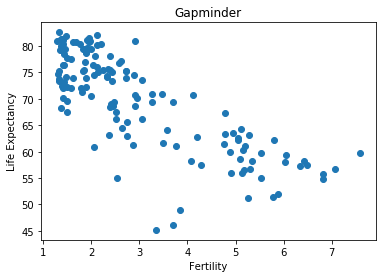

In [49]:
plt.scatter(X_fertility, y)
plt.title("Gapminder")
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")
plt.show();

In [53]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)
prediction_space

array([[1.28      ],
       [1.40877551],
       [1.53755102],
       [1.66632653],
       [1.79510204],
       [1.92387755],
       [2.05265306],
       [2.18142857],
       [2.31020408],
       [2.43897959],
       [2.5677551 ],
       [2.69653061],
       [2.82530612],
       [2.95408163],
       [3.08285714],
       [3.21163265],
       [3.34040816],
       [3.46918367],
       [3.59795918],
       [3.72673469],
       [3.8555102 ],
       [3.98428571],
       [4.11306122],
       [4.24183673],
       [4.37061224],
       [4.49938776],
       [4.62816327],
       [4.75693878],
       [4.88571429],
       [5.0144898 ],
       [5.14326531],
       [5.27204082],
       [5.40081633],
       [5.52959184],
       [5.65836735],
       [5.78714286],
       [5.91591837],
       [6.04469388],
       [6.17346939],
       [6.3022449 ],
       [6.43102041],
       [6.55979592],
       [6.68857143],
       [6.81734694],
       [6.94612245],
       [7.07489796],
       [7.20367347],
       [7.332

0.6192442167740035


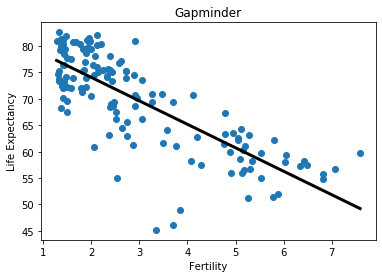

In [55]:
# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot observations
plt.scatter(X_fertility, y)
plt.title("Gapminder")
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show();

#### Train/test split for regression

train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the R2 score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array X and target variable array y have been pre-loaded for you from the DataFrame df.

- Import LinearRegression from sklearn.linear_model, mean_squared_error from sklearn.metrics, and train_test_split from sklearn.model_selection.
- Using X and y, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of 42.
- Create a linear regression regressor called reg_all, fit it to the training set, and evaluate it on the test set.
- Compute and print the R2 score using the `.score()` method on the test set.
- Compute and print the RMSE. To do this, first compute the Mean Squared Error using the `mean_squared_error()` function with the arguments y_test and y_pred, and then take its square root using `np.sqrt()`.

In [63]:
y = np.array(df.life.values)
X = np.array(df.drop('life', axis=1).values)

In [64]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430136
Root Mean Squared Error: 3.247601080036944


#### 5-fold cross-validation

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.
In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's cross_val_score() function uses R2 as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

The DataFrame has been loaded as df and split into the feature/target variable arrays X and y. 

- Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
- Create a linear regression regressor called reg.
- Use the `cross_val_score()` function to perform 5-fold cross-validation on X and y.
- Compute and print the average cross-validation score. You can use NumPy's `mean()` function to compute the average.

In [66]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {} <- R2 mean value".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793507 <- R2 mean value


#### K-Fold CV comparison

Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In the IPython Shell, you can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:

`%timeit cross_val_score(reg, X, y, cv = ____)`

- Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
- Create a linear regression regressor called reg.
- Perform 3-fold CV and then 10-fold CV. Compare the resulting mean scores.

In [68]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.8718712782622265
0.8436128620131361


In [69]:
%timeit cross_val_score(reg, X, y, cv=3)

3.27 ms ± 158 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [70]:
%timeit cross_val_score(reg, X, y, cv=10)

10.9 ms ± 641 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Regularization I: Lasso

Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. You will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

- Import Lasso from sklearn.linear_model.
- Instantiate a Lasso regressor with an alpha of 0.4 and specify normalize=True.
- Fit the regressor to the data and compute the coefficients using the coef_ attribute.
- Plot the coefficients on the y-axis and column names on the x-axis.

In [72]:
# Import Lasso
from sklearn.linear_model import Lasso

# Return a list of columns without the target column
df_columns = df.drop('life', axis=1).columns

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)  # should ne X_train, y_train

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


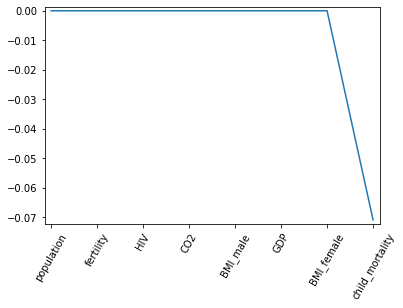

In [73]:
# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show();

* According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

#### Regularization II: Ridge

Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2 norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each, using function below which plots the R2 score as well as standard error for each alpha.

The motivation behind this exercise is for you to see how the R2 score varies with different alphas, and to understand the importance of selecting the right value for alpha. 

- Instantiate a Ridge regressor and specify normalize=True.
- Inside the for loop:
    - Specify the alpha value for the regressor to use.
    - Perform 10-fold cross-validation on the regressor with the specified alpha. The data is available in the arrays X and y.
    - Append the average and the standard deviation of the computed cross-validated scores. NumPy has been pre-imported for you as np.
- Use the `display_plot()` function to visualize the scores and standard deviations.

In [76]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    std_error = cv_scores_std / np.sqrt(10)
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

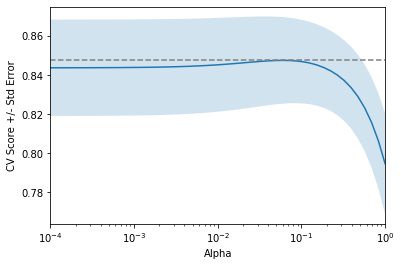

In [77]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

Source : Datacamp